In [1]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
from datasets.polynomials import Polynomial
from models.linear_regression import LinearRegression

6.3234 + 0.0792x + 0.2296x^2


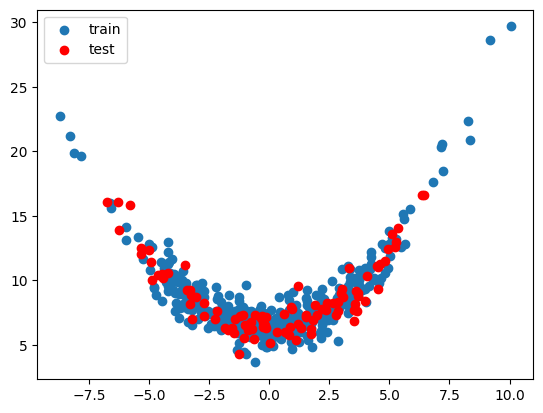

In [13]:
quadratic = Polynomial()
train_x, train_y = quadratic.generate(400)
test_x, test_y = quadratic.generate(100)

plt.scatter(train_x, train_y, label="train")
plt.scatter(test_x, test_y, label="test", color="r")
plt.legend()

avg training loss: 0.5078729711187551
avg testing loss: 0.44031607109464416
predicted function: 6.4042 +0.071x +0.2266x^2
actual function: 6.3234 + 0.0792x + 0.2296x^2


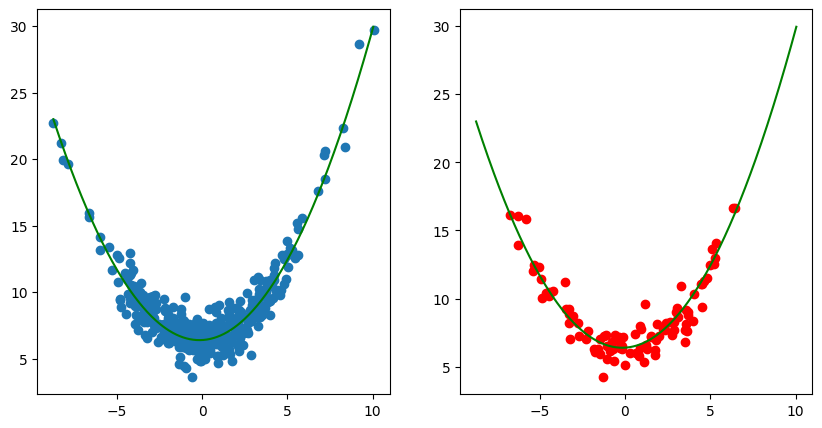

In [20]:
model = LinearRegression(order=2)
theta, train_loss = model.train(train_x, train_y)
_, test_loss = model.predict(test_x, theta, y=test_y)

print(f"avg training loss: {train_loss / len(train_x)}")
print(f"avg testing loss: {test_loss / len(test_x)}")
print(f"predicted function: {model.to_string(theta)}")
print(f"actual function: {quadratic}")

plt_x = np.arange(min(train_x), max(train_x), 0.05)
plt_y = model.predict(plt_x, theta)

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].scatter(train_x, train_y)
ax[0].plot(plt_x, plt_y, c="g")

ax[1].scatter(test_x, test_y, c="r")
ax[1].plot(plt_x, plt_y, c="g")


linear model: 8.4956 +0.1804x
avg linear training loss: 4.925699834141287
avg linear testing loss: 4.0235129761765105
cubic model: 6.4129 +0.0371x +0.2251x^2 +0.0012x^3
avg cubic training loss: 0.5038040729898251
avg cubic testing loss: 0.43483908696684687


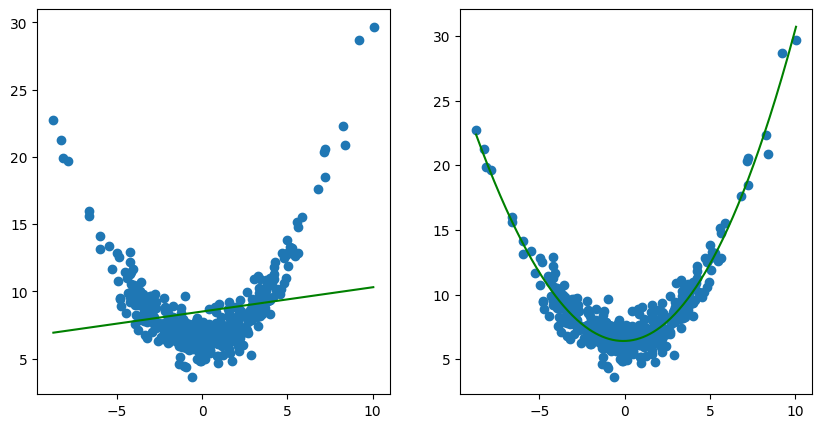

In [21]:
lin_model = LinearRegression(order=1)
lin_theta, lin_loss = lin_model.train(train_x, train_y)
_, lin_test_loss = lin_model.predict(test_x, lin_theta, y=test_y)

cub_model = LinearRegression(order=3)
cub_theta, cub_loss = cub_model.train(train_x, train_y)
_, cub_test_loss = cub_model.predict(test_x, cub_theta, y=test_y)

print(f"linear model: {lin_model.to_string(lin_theta)}")
print(f"avg linear training loss: {lin_loss / len(train_x)}")
print(f"avg linear testing loss: {lin_test_loss / len(test_x)}")
print(f"cubic model: {cub_model.to_string(cub_theta)}")
print(f"avg cubic training loss: {cub_loss / len(train_x)}")
print(f"avg cubic testing loss: {cub_test_loss / len(test_x)}")

lin_y = lin_model.predict(plt_x, lin_theta)
cub_y = cub_model.predict(plt_x, cub_theta)

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].scatter(train_x, train_y)
ax[0].plot(plt_x, lin_y, c="g")

ax[1].scatter(train_x, train_y)
ax[1].plot(plt_x, cub_y, c="g")